#### Hello (noteboek geinspireert door Kaggle aangepast door Ferry !!)
Dit notebook en een vliegende start in data-analyse en machinelearning.

1)Feature Selection

2)Model selection

3)Input validation

4)Voorspellen

5)Gradio webinterface naar diagnostic tool


## Vraag 1

Beantwoorden in de volgende cel:
- Wat is diabetes?
- Hoe krijg je het?
- Zijn er verschillende soorten?
- Wat zijn de gevolgen?
- Hoe wordt het gediagnostiseerd?
- Hoe wordt het behandeld?


#### Ken je domein zodat je de data kan evalueren:

##### Wat is diabetes? 

Diabetes is een chronische stofwisselingsziekte, ook wel aangeduid met de vorige term, suikerziekte. De bloedsuikerspiegel is te hoog bij mensen met diabetes. Het lichaam is niet in staat de bloedsuikerspiegel stabiel te houden.De meest bekende vormen van diabetes zijn 1 en 2. Iedereen kan diabetes krijgen.

##### Hoe krijg je het?

Er zijn verschillende factoren die bijdragen aan het ontwikkelen van diabetes, waaronder genetische aanleg, overgewicht, ongezonde voeding, gebrek aan beweging en veroudering. Bovendien kunnen bepaalde ziekten en medicijnen ook het risico op het ontwikkelen van diabetes verhogen. 

##### Zijn er verschillende soorten?

Er zijn twee belangrijke soorten diabetes: type 1 en type 2.
Bij type 1 diabetes maakt het lichaam geen insuline meer en moet deze van buitenaf worden gegeven. Dit gebeurt omdat het lichaam de cellen die insuline maken heeft aangevallen.
Type 2 diabetes gebeurt meestal door verstoring van hoe het lichaam insuline gebruikt en een afname in hoeveelheid insuline die het lichaam maakt. Dit is de meest voorkomende vorm en gebeurt vaak door overgewicht, slechte voeding en te weinig beweging.
Er zijn ook andere, minder bekende vormen van diabetes, zoals die tijdens zwangerschap of door genen, ziekten of andere oorzaken.

##### Wat zijn de gevolgen?

De gevolgen van diabetes kunnen ernstig zijn als de ziekte niet goed wordt beheerd. Enkele van deze gevolgen zijn:

Hart- en vaatziekten: hoge bloedsuikerspiegels kunnen schade veroorzaken aan bloedvaten en het hart, wat het risico op hart- en vaatziekten verhoogt.

Nierschade: diabetes kan de nieren beschadigen en leiden tot nierfalen.

Zichtproblemen: hoge bloedsuikerspiegels kunnen schade veroorzaken aan de bloedvaten in het oog, wat het risico op blindheid verhoogt.

Voetproblemen: diabetes kan het gevoel in de voeten beïnvloeden en het risico op infecties en wonden verhogen, wat kan leiden tot amputatie.

Zenuwschade: diabetes kan leiden tot schade aan de zenuwen, wat pijn, tintelingen en verlies van gevoel in de ledematen kan veroorzaken.

Seksuele problemen: diabetes kan leiden tot seksuele problemen, zoals erectiestoornissen bij mannen.

##### Hoe wordt het gediagnostiseerd?

Diabetes kan worden bepaald door middel van bloedtest. Hierbij wordt het suikergehalte in het bloed gemeten, meestal door middel van een vingerprik. Als u nuchter bent, dus niets heeft gegeten of gedronken, moet de waarde onder de 5,6 (mmol/l) liggen.

##### Hoe wordt het behandeld?

De belangrijkse onderdelen van de behandeling van diabetes zijn gezond eten, genoeg bewegen, niet roken, medicijnen en insuline. Heb je diabetes type 2, dan krijg je meestal naast medicijnen ook voedings- en bewegingsadviezen. Want met een pilletje ben je er nog niet. Gezond eten en bewegen is vaak belangrijker.

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


In [6]:
 # laad de data in
diab = pd.read_csv('diabetes.csv')

In [7]:
diab.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Op basis van deze tabel kunnen we zien dat de min van BloodPressure, SkinThickness, BMI en Glucose nul
en dat mag niet. Dus de conclusie is deze data is niet correct.

In [9]:
# test 1 (b.v nul waarden)
nulwaarden = (diab == 0).sum()

nulwaarden

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
# test 2 (b.v nan waarden)
nan_waarden = diab.isna().sum()

nan_waarden

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# test 3 (Wat kan je nog meer testen) of er strings zijn in de dataset
diab.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
# hiermee kunnen we kijken naar gevallen met diabetes
gevallen_met_diab = (diab['Outcome'] == 1).sum()

gevallen_met_diab

268

In [13]:
# hiermee kunnen we kijken naar gevallen zonder diabetes
gevallen_met_diab = (diab['Outcome'] == 0).sum()

gevallen_met_diab

500

C:\Users\Aghoo\AppData\Local\Temp\ipykernel_11828\3547628345.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(length/2),3,j+1)


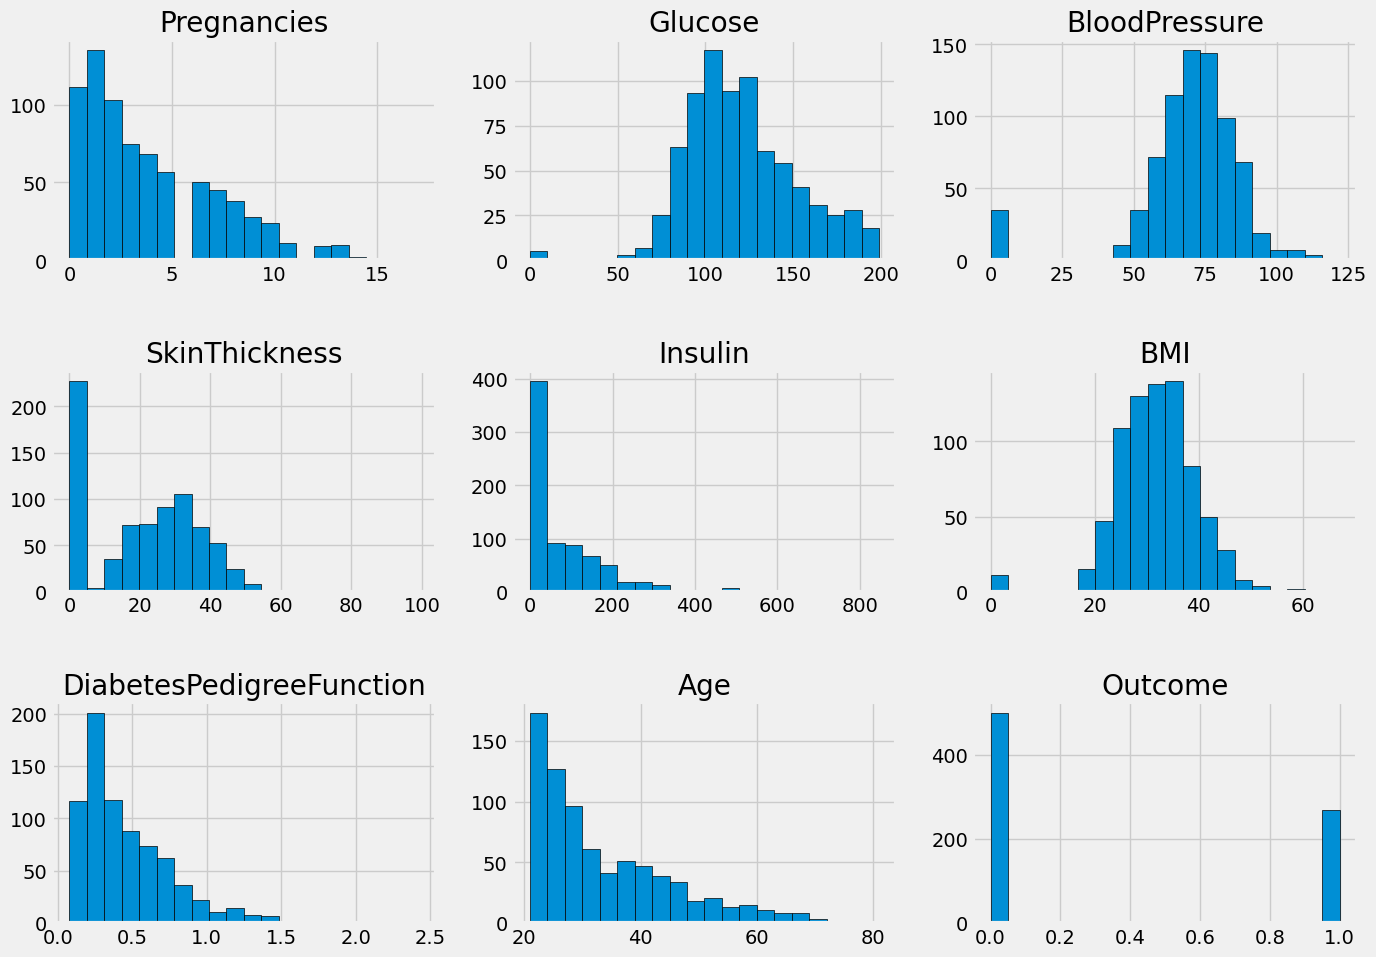

In [14]:
columns=diab.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

C:\Users\Aghoo\AppData\Local\Temp\ipykernel_11828\3420417483.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(length/2),3,j+1)


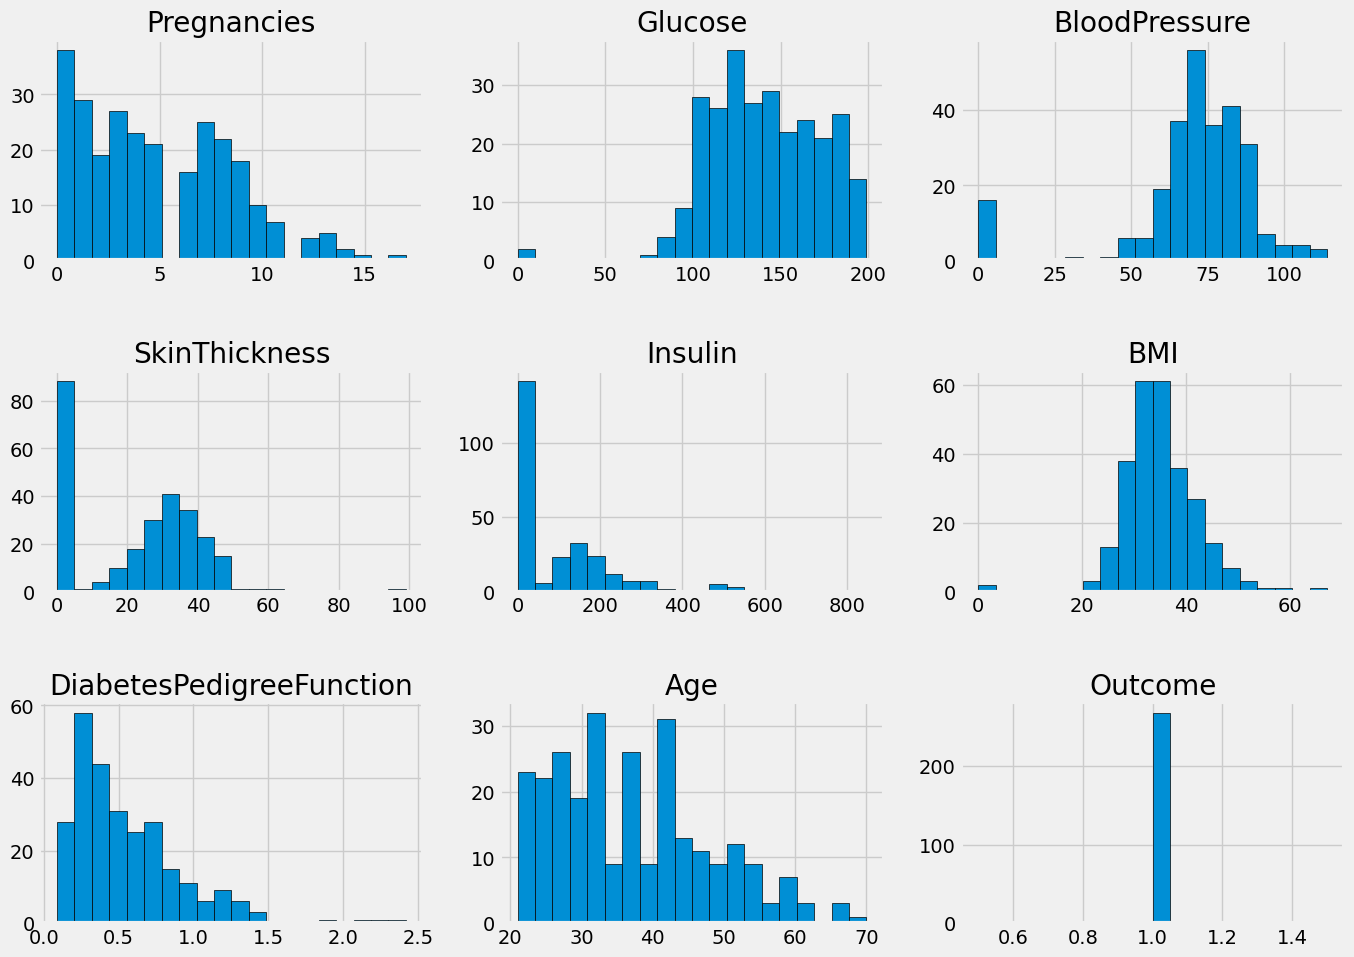

In [15]:
diab_gevallen = diab.loc[diab['Outcome'] == 1]

columns=diab_gevallen.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab_gevallen[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [16]:
# vervang 0 and NaN waarden.
# test 1 (b.v nul waarden)

# ik kies om de 0 waarden te vervangen door de 
# mediaan te berekenen om te zien wat voor verandering zou komen in de nieuw plots 
# en ik weet dat deze keuze niet echt geschikt is aangezien er outliers aanwezig is 

kolommen = ["Glucose","BloodPressure","SkinThickness","BMI"]

diab[kolommen] = diab[kolommen].replace(0 ,diab[kolommen].median())

nulwaarden = (diab == 0).sum()

nulwaarden

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

C:\Users\Aghoo\AppData\Local\Temp\ipykernel_11828\3420417483.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(length/2),3,j+1)


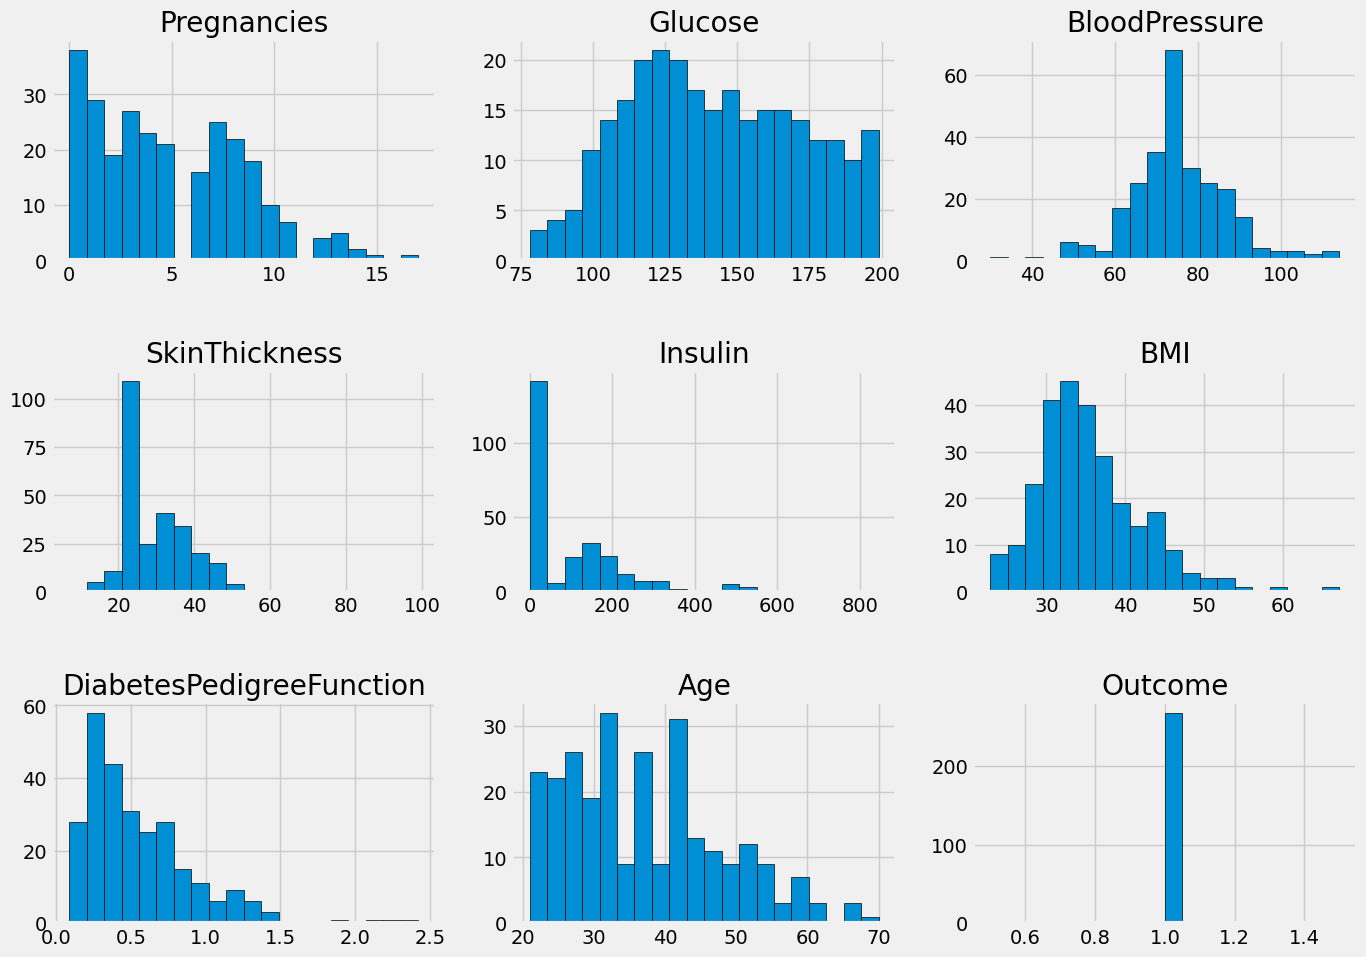

In [17]:
diab_gevallen = diab.loc[diab['Outcome'] == 1]

columns=diab_gevallen.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab_gevallen[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<AxesSubplot: >

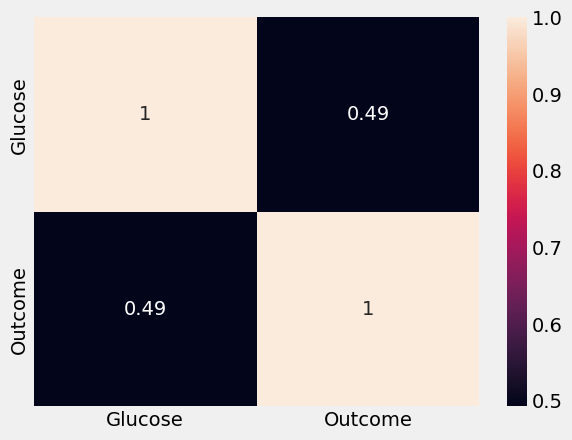

In [18]:
corr = diab[['Glucose', 'Outcome']].corr()
sns.heatmap(corr, annot=True)

<AxesSubplot: >

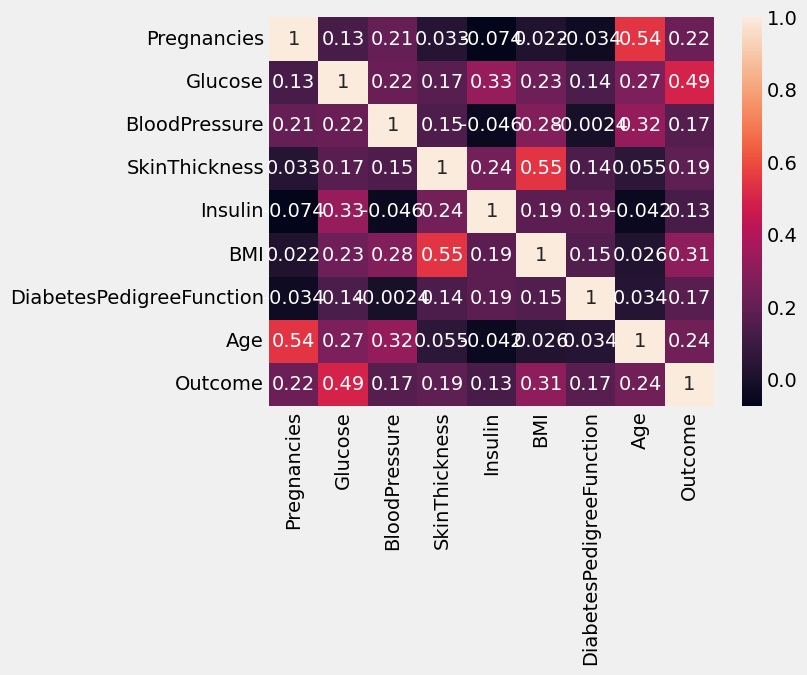

In [19]:
# Heatmap
sns.heatmap(diab.corr(), annot=True)

In [20]:
# Importeen aantal standaard systeem voor machine-learning gebruik pip om de ontbrekende modules te installeren.

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [21]:
# De code hieronder is absuluut noodzakelijk voor een ML training.
# Er staat wel een regel teveel!, wat kan weg?

outcome=diab['Outcome'] # deze kan weg, aangezien deze regel niet direct wordt gebruikt in de rest van de code.
data=diab[diab.columns[:8]] # maar deze kan ook weg
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [22]:
train_X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,72,23,0,19.6,0.832,72
706,10,115,72,23,0,32.0,0.261,30
606,1,181,78,42,293,40.0,1.258,22
118,4,97,60,23,0,28.2,0.443,22


In [23]:
train_Y.head(5)

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

In [24]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel =',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel = rbf is 0.7604166666666666
Accuracy for SVM kernel = linear is 0.7604166666666666


In [25]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.7604166666666666


In [26]:
# train model
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)

# voorspelen met de data test
pred_Y = model.predict(test_X)

print('The accuracy of the Decision Tree is', metrics.accuracy_score(pred_Y, test_Y))

The accuracy of the Decision Tree is 0.703125


### Alle systemen op een rijtje.


In [27]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.760417
Radial Svm,0.760417
Logistic Regression,0.760417
KNN,0.734375
Decision Tree,0.729167


De bovenstaande algoritmen geven geen erg hoge nauwkeurigheid. Dit kan worden verbeterd door attributeselectie te gebruiken en alleen relevante kolommen te gebruiken. We kunnen ook gebruik maken van ensembling of middeling van verschillende algoritmen. 

In [28]:
test_Y.describe()

count    192.000000
mean       0.348958
std        0.477887
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [30]:
#  Confusion matrix.
from sklearn import metrics

model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)

conf_mat = metrics.confusion_matrix(test_Y, prediction)

print(conf_mat)

[[108  17]
 [ 29  38]]


## Feature Extraction/ Selection:

- Veel attributen beïnvloeden de nauwkeurigheid van het algoritme.

- Feature extractie betekent dat je alleen de belangrijkste attributen selecteert om de nauwkeurigheid te verbeteren. 

- Selectie van de belangrijkste attributen verkleint de kans op overfitting en versnelt de training.

- Je kan op twee manieren de belangrijkste attributen selecteren:
 - Via de correlatie matrix en dan de attributen met een lage onderlinge correlatie bewaren/schrappen
 - Via een RandomforestClassifier deze geeft het belang van de attributen aan.


In [31]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.246254
BMI                         0.171289
Age                         0.138700
DiabetesPedigreeFunction    0.122029
BloodPressure               0.089946
Pregnancies                 0.083154
SkinThickness               0.075363
Insulin                     0.073265
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Ga nu terug naar je correlatie matrix en kies de 5 attributen met de laagste onderlinge correlatie en vergelijk deze met de top 5 van de RandomForestClassifier?


Verschil: Er zitten in de 5 attributen met de laagste onderlinge correlatie de volgende attributen:
DiabetesPedigreeFunction, BloodPressure en Pregnancies terwijl dat niet zo is bij RandomForestClassifier

Overeenkomst: De insulin en SkinThickness staan bij beiden onderaan.

### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes en geef aan waarop je dat baseert?

Antwoord:
. Glucose
. BMI

.. Dat is terug te zien zowel in de heatup als in de RandomForestClassifier. En ook uit het onderzoek dat ik in het begin deed, waren deze twee kenmerken twee van de belangrijkste oorzaken van diabetes.



### Tot slot: 
Gezien de resultaten van de voorspellingen zou je een systeem van ML advisreen om disgnose te stellen of iemand diabetes heeft of niet


## Tot slot maak een webapp met je beste model in gradio?
## Als je het notebook download als Python heb je een complete webapp

In [32]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100,random_state=0)

train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

model.fit(train_X,train_Y)

# voorspelen met de data test
pred_Y = model.predict(test_X)

print('The accuracy of the Random Forest is', metrics.accuracy_score(pred_Y, test_Y))


The accuracy of the Random Forest is 0.765625


In [33]:
import gradio as gr

# make de interface compleet ..

def predict(Leeftijd, Aantal_zwangerschappen, BMI) :
    
    # zet input data om naar een formaat geschikt voor de predict fucntie
    mydata = {
        'Pregnancies' : [Aantal_zwangerschappen] ,
        'Glucose' : [85] ,
        'BloodPressure' : [72] ,
        'SkinThickness' : [35] ,
        'Insulin' : [0] ,
        'BMI' : [BMI] ,
        'DiabetesPedigreeFunction' : [0.726] ,
        'Age' : [Leeftijd] 
    }
    x = pd.DataFrame(mydata)  

    prediction = model.predict(x)
    
    return  'kans  '+ str(prediction)


demo = gr.Interface(fn=predict, 
                    inputs=[gr.Slider(21,80,step = 1), "text", gr.Slider(10,50,)], 
                    outputs=["text"])

demo.launch()
    

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
